In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import cv2 as cv

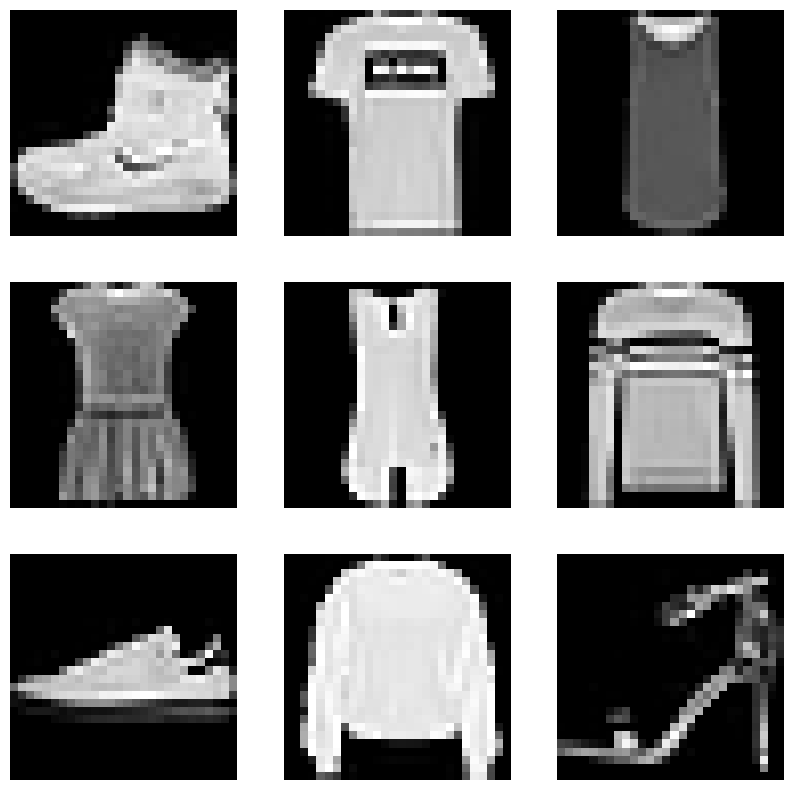

In [7]:
# CARGAR DATOS DE ENTRENAMIENTO Y PRUEBA
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Preparar los datos
# Estandarizar los valores entre 0 y 1 (0 y 255)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Mostrar imágenes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [8]:
# Estandarizar los valores entre 0 y 1 pixeles (0,255)
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [11]:
# Cambiar forma de los datos de entrada a 28x28 y a blanco/negro (1) color (3)
x_train = x_train.reshape(-1,28,28,1) # -1 establece automáticamente la dimensión
x_test = x_test.reshape(-1,28,28,1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
# Crear arquitectura de la red neuronal
modelo = keras.Sequential()
# Capa convolucion (#filtros,kernel,fun activacion, forma entrada)
capa_convolucion = Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1))
# Capa agrupamiento 
capa_agrupamiento = MaxPooling2D(pool_size=(2,2))
# Capa aplanamiento
capa_aplanamiento = Flatten()
# Capas densas (escondidas)
capa_oculta = Dense(units=64,activation="relu")
# Capas salida
capa_salida = Dense(units=10,activation="softmax")

modelo = keras.Sequential([capa_convolucion, capa_agrupamiento, capa_aplanamiento, capa_oculta, capa_salida])

# Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["accuracy"])
# Entrenar el modelo
modelo.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 15s 16ms/step - loss: 1.1306 - accuracy: 0.6073
Epoch 2/10
938/938 [==============================] - 14s 15ms/step - loss: 0.6484 - accuracy: 0.7597
Epoch 3/10
938/938 [==============================] - 15s 16ms/step - loss: 0.5685 - accuracy: 0.7903
Epoch 4/10
938/938 [==============================] - 15s 16ms/step - loss: 0.5257 - accuracy: 0.8094
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 0.4968 - accuracy: 0.8215
Epoch 6/10
938/938 [==============================] - 15s 16ms/step - loss: 0.4750 - accuracy: 0.8298
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 0.4586 - accuracy: 0.8370
Epoch 8/10
938/938 [==============================] - 15s 16ms/step - loss: 0.4435 - accuracy: 0.8435
Epoch 9/10
938/938 [==============================] - 15s 16ms/step - loss: 0.4331 - accuracy: 0.8471
Epoch 10/10
938/938 [==============================] - 15s 16ms/step - loss: 0.422

In [13]:
# Evaluar el modelo con los datos de prueba
perdida = modelo.evaluate(x_test,y_test)
print("La funcion de perdida es:", perdida[0])
print("La precision es:", perdida[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4447 - accuracy: 0.8395
La funcion de perdida es: 0.4446607828140259
La precision es: 0.8395000100135803


1/1 [==============================] - 0s 20ms/step
La imagen se clasifica como: Suéter


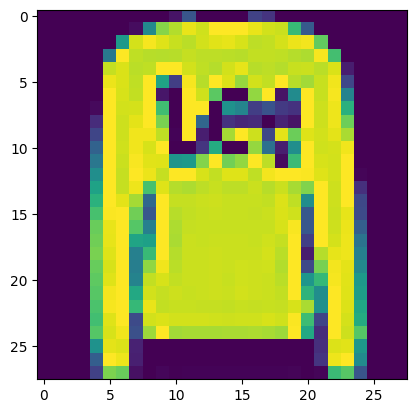

In [23]:
# Leer imagen
imagen=x_test[1]
plt.imshow(imagen)

# Agregar una dimension adicional para repesentar el canal de color (escala de grises)
imagen=np.expand_dims(imagen, axis=-1)

# Agregar una dimension adicional para repesentar el lote de imagenes
imagen=np.expand_dims(imagen,axis=0)

# Imprimir la clase predicha
nombres_clases = [
    "Camiseta",
    "Pantalón",
    "Suéter",
    "Vestido",
    "Abrigo",
    "Sandalia",
    "Camisa",
    "Zapatilla",
    "Bolso",
    "Botín"
]

# Realizar la predicción
prediccion = modelo.predict(imagen)
predicted_class = np.argmax(prediccion[0])

# Imprimir la clase predicha
print("La imagen se clasifica como:", nombres_clases[predicted_class])

1/1 [==============================] - 0s 22ms/step
La imagen se clasifica como: Sandalia


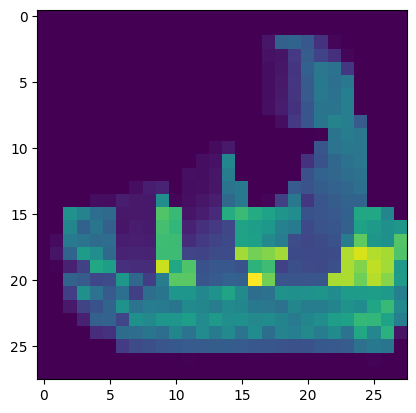

In [21]:
# Leer imagen
imagen = cv.imread("sandalia.png")
# plt.imshow(imagen)

#Aplicar filtro de desenfoque
imagen = cv.GaussianBlur(imagen,(3,3),0)

#Convertir a escala de grises
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)

# Redimensionar las imágenes a un tamaño de 28x28
imagen = cv.resize(imagen,(28,28),interpolation=cv.INTER_NEAREST)

# Aplicar la inversión de colores
imagen = cv.bitwise_not(imagen)
plt.imshow(imagen)

# Normalizar los valores de píxeles entre 0 y 1
imagen_normalizada = imagen / 255.0

# Agregar una dimensión adicional para representar el canal de color (escala de grises)
imagen = np.expand_dims(imagen, axis=-1)

# Agregar una dimensión adicional para representar el lote de imágenes
imagen = np.expand_dims(imagen, axis=0)

# Realizar la predicción
prediccion = modelo.predict(imagen)
predicted_class = np.argmax(prediccion[0])

# Imprimir la clase predicha
nombres_clases = [
    "Camiseta",
    "Pantalón",
    "Suéter",
    "Vestido",
    "Abrigo",
    "Sandalia",
    "Camisa",
    "Zapatilla",
    "Bolso",
    "Botín"
]

# Realizar la predicción
prediccion = modelo.predict(imagen)
predicted_class = np.argmax(prediccion[0])

# Imprimir la clase predicha
print("La imagen se clasifica como:", nombres_clases[predicted_class])
